# Working with brainsight module

In [1]:
from pynetstim.utils import FreesurferCoords, Surf, FreesurferSurf
from pynetstim.brainsight import BrainsightSessionFile,Samples,Targets
from surfer import Brain
from mayavi import mlab 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## brainsight 

In [2]:
bs = BrainsightSessionFile('../example_data/brainsightsession_example_data.txt',base_name='',out_dir='.')
targets = Targets('./targets.txt')
samples = Samples('./samples.txt',print_summary=True)

Number of sessions:  6
Session 1
------------
Session targets: L_DLPFC,L_IPL,V1_M1_1,V1_M1_2,V1_M1_3

	-> Target: L_DLPFC (start:0, end:6, stimulations:7)

	-> Target: V1_M1_1 (start:7, end:12, stimulations:6)

	-> Target: V1_M1_2 (start:13, end:25, stimulations:13)

	-> Target: V1_M1_3 (start:26, end:175, stimulations:150)

	-> Target: L_DLPFC (start:176, end:783, stimulations:608)

	-> Target: L_IPL (start:784, end:1233, stimulations:450)

	-> Target: V1_M1_3 (start:1234, end:1975, stimulations:742)


Session 2
------------
Session targets: R_DLPFC,R_Occ,V1_M1_3,V2_M1_1,V2_M1_2,V2_M1_3,V2_M1_4,c_Occ,c_R_DLPFC

	-> Target: V1_M1_3 (start:0, end:23, stimulations:24)

	-> Target: V2_M1_1 (start:24, end:39, stimulations:16)

	-> Target: V2_M1_2 (start:40, end:49, stimulations:10)

	-> Target: V2_M1_3 (start:50, end:51, stimulations:2)

	-> Target: V2_M1_2 (start:52, end:54, stimulations:3)

	-> Target: V2_M1_1 (start:55, end:57, stimulations:3)

	-> Target: V2_M1_2 (start:58, end:59, sti

In [3]:
### selecting a target for a session or all sessions
samples.get_target('L_DLPFC','Session 1').head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,target_error,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment
0,Sample 1,Session 1,1,L_DLPFC,-51.621,16.756,90.272,0.619,-0.435,0.654,...,45.470,24.556,27.447,(null),2018-03-22,14:17:43.793,TTL2,Broad - CT210,0.0,(null)
1,Sample 2,Session 1,2,L_DLPFC,-50.824,14.926,90.438,0.571,-0.459,0.680,...,49.236,22.121,24.204,(null),2018-03-22,14:17:49.104,TTL2,Broad - CT210,0.0,(null)
2,Sample 3,Session 1,3,L_DLPFC,-48.014,13.790,92.569,0.573,-0.487,0.659,...,50.508,21.528,22.823,(null),2018-03-22,14:18:06.976,TTL2,Broad - CT210,0.0,(null)
3,Sample 4,Session 1,4,L_DLPFC,-47.989,13.931,92.499,0.566,-0.497,0.658,...,51.273,19.560,21.841,(null),2018-03-22,14:18:11.635,TTL2,Broad - CT210,0.0,(null)
4,Sample 5,Session 1,5,L_DLPFC,-40.031,12.046,99.932,0.539,-0.573,0.617,...,54.311,20.525,17.314,(null),2018-03-22,14:18:31.412,TTL2,Broad - CT210,0.0,(null)


## visualization of stimulations

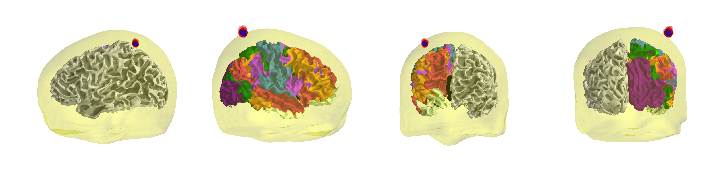

In [6]:
subject = 'example_freesurfer_subject'
subjects_dir='./example_data'
target = 'c_DAN'


## reading surfaces
skin_surf = Surf('example_data/example_freesurfer_subject/bem/lh.watershed_outer_skin_surface')
brain = Brain(subject, subjects_dir=subjects_dir, hemi='both',offset=False,surf='white',background='white')
mlab.triangular_mesh(skin_surf.vertices[:,0],skin_surf.vertices[:,1],skin_surf.vertices[:,2],skin_surf.faces,opacity=.2,color=(1,1,0))

### adding annotation
#brain.add_annotation('Yeo2011_7Networks_N1000',hemi='lh',borders=False)
brain.add_annotation('Yeo2011_7Networks_N1000',hemi='rh',borders=False,remove_existing=False)


### adding target
target_coord = FreesurferCoords(targets.get_targets_coords([target]),subject,subjects_dir).coordinates['ras_tkr_coords']
target_coord_skin = skin_surf.project_coords(target_coord)
mlab.points3d(target_coord[:,0],target_coord[:,1],target_coord[:,2],scale_factor=8,color=(0,1,0))
#mlab.points3d(target_coord_skin[:,0],target_coord_skin[:,1],target_coord_skin[:,2],scale_factor=8,color=(0,1,0))

### adding stims
stims = samples.get_target(target)
stims = stims[stims.dist_to_target<50]
stims_coords = FreesurferCoords(stims[['loc_x','loc_y','loc_z']],subject,subjects_dir).coordinates['ras_tkr_coords']
mlab.points3d(stims_coords[:,0],stims_coords[:,1],
              stims_coords[:,2], scale_factor=8,color=(1,0,0),reset_zoom=False,opacity=.2)

stim_mean_coord = np.mean(stims_coords,axis = 0)
mlab.points3d(stim_mean_coord[0],stim_mean_coord[1],stim_mean_coord[2],color=(0,0,1),scale_factor=8,reset_zoom=False,opacity=.6)
mlab.text3d(stim_mean_coord[0],stim_mean_coord[1],stim_mean_coord[2],target,scale=1)



### saving shots
brain.save_imageset('./temp/stims',['med', 'lat', 'ros', 'caud'], 'png')
mlab.close()

### 
fig,ax = plt.subplots(1,4,figsize=(12,8))
for i,s in enumerate(['med','lat','ros','caud']):
    img = plt.imread('temp/stims_%s.png'%s)
    ax[i].imshow(img)
    ax[i].set_axis_off()
    
fig.savefig('./stim_fig.png',dpi=600,bbox_inches='tight')

In [5]:
mlab.close()